**Lets do a simple exploration to see which parties were dominant across states**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

aggregated_election_results_data.csv
ga_election_results_data.csv
mr_election_results_data.csv
pb_election_results_data.csv
up_election_results_data.csv
ut_election_results_data.csv



In [2]:
df = pd.read_csv('../input/aggregated_election_results_data.csv')
print(df.shape)
df.head()

(7842, 5)


,State,Constituency,Candidate,Party,Votes
0,PB,Abohar,ARUN NARANG,Bharatiya Janata Party,55091
1,PB,Abohar,SUNIL JAKHAR,Indian National Congress,51812
2,PB,Abohar,ATUL NAGPAL,Aam Aadmi Party,13888
3,PB,Abohar,PRITHI RAJ,Bahujan Samaj Party,642
4,PB,Abohar,NATHU RAM,Independent,614


<h2>Top 3 Parties by Vote

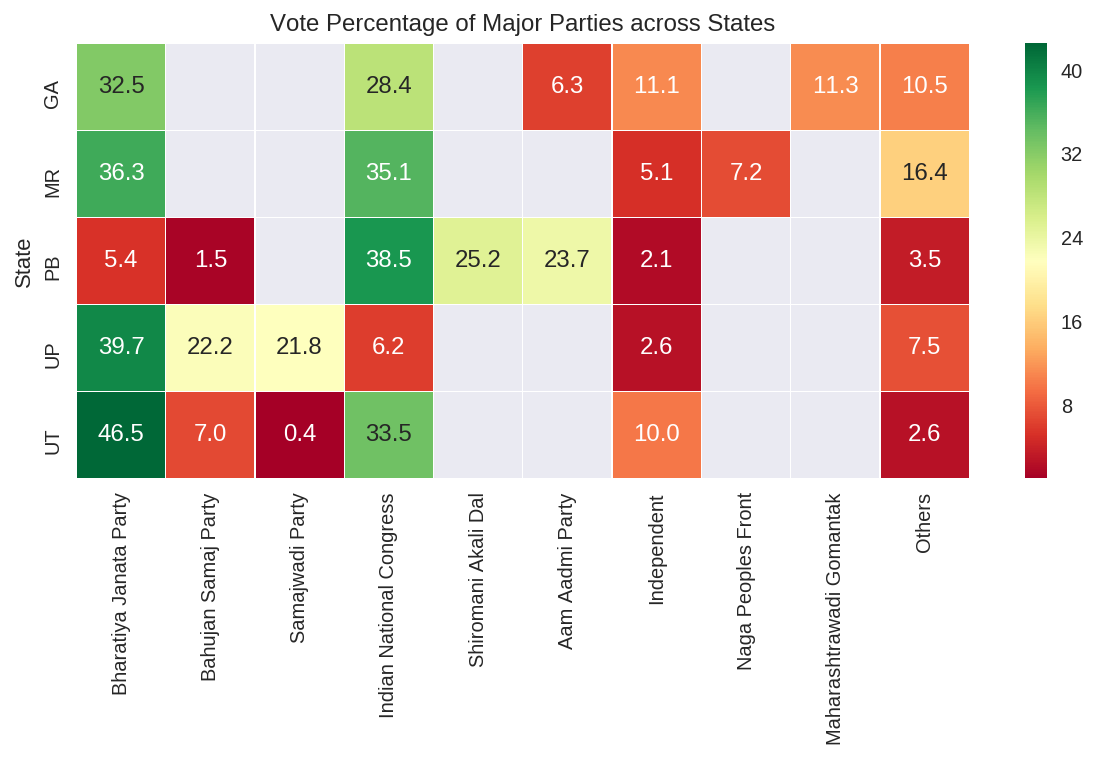

In [3]:
top_party = df.groupby(['State','Party'])['Votes'].sum().reset_index().sort_values(by='Votes',ascending=0)
top_party = top_party.groupby('State').head(3)

top_party_names = list(top_party.Party.unique())
df['Top_Party'] = np.where(df['Party'].isin(top_party_names),df['Party'],'Others')

tdf = df.pivot_table(index='State',columns='Top_Party',values='Votes',aggfunc='sum',margins=True)

tdf.columns = [s1 for s1 in tdf.columns.tolist()]

all_parties = list(tdf.columns)
all_parties.remove('All')

for col in all_parties:
    tdf[col] = (tdf[col]/tdf['All']).apply(lambda x : np.round(x*100,1))

tdf = tdf.drop('All')
tdf = tdf.drop('All',axis=1)
tdf = tdf.reset_index()

temp = tdf[top_party_names + ['State','Others']].groupby('State').sum()

plt.figure(figsize=(10, 4))
sns.heatmap(temp, 
            linewidths=0.1, linecolor='white', annot=True,fmt=".1f",
            cmap='RdYlGn', 
            robust=True)
plt.title('Vote Percentage of Major Parties across States');

**It is clear that Bhartiya Janata Party had majority votes in all States except Punjab. <br>
In Punjab, Indian National Congress had majority votes.**

<h2>Top 3 parties by seats

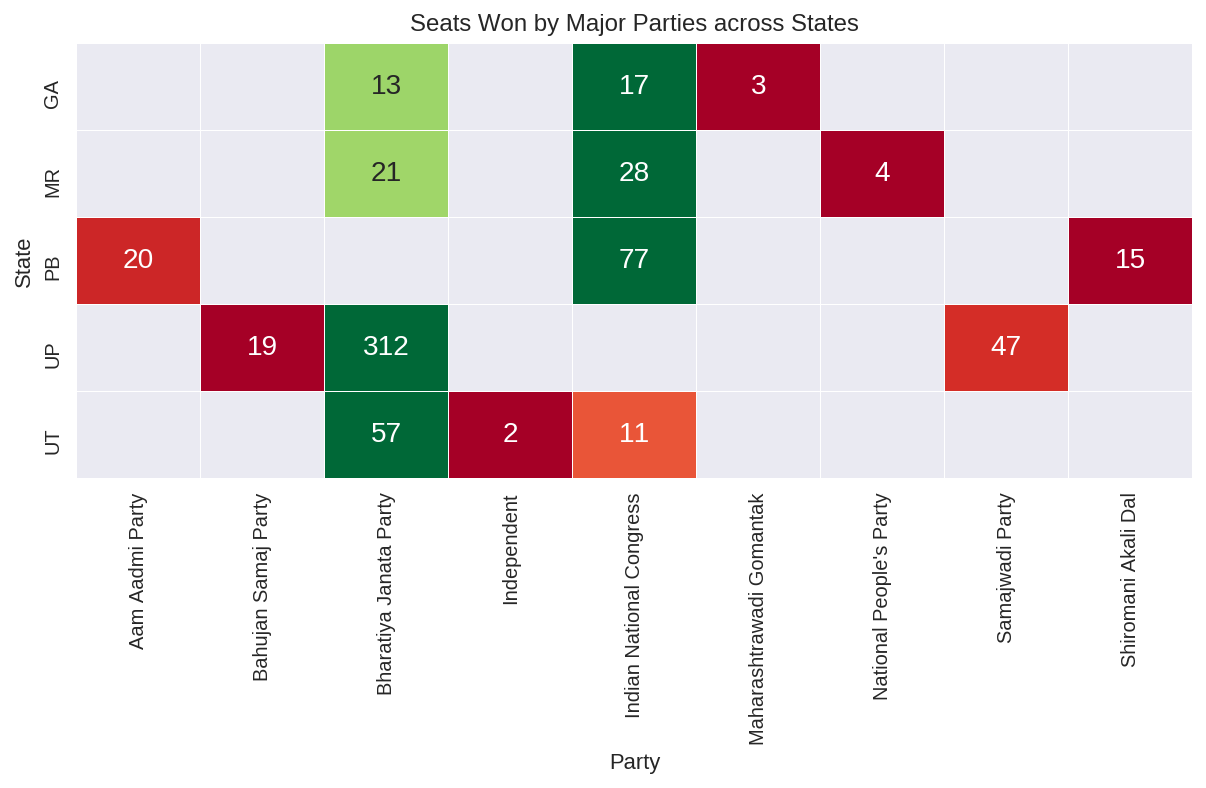

In [4]:
tdf = df.groupby(['State','Party','Constituency','Candidate'])['Votes'].sum().sort_values(ascending=0).reset_index()
tdf = tdf.groupby(['State','Constituency']).first().reset_index()
tdf = tdf.groupby(['State','Party']).size().sort_values(ascending=0).reset_index()
tdf = tdf.groupby(['State']).head(3).rename(columns = {0:'Wins'})

temp = tdf.pivot_table(index='State',columns='Party',values='Wins',aggfunc='sum',margins=True)
all_parties = list(temp.columns)
all_parties.remove('All')

temp_values = temp.drop('All').drop('All',axis=1).values
for col in all_parties:
    temp[col] = (temp[col]/temp['All']).apply(lambda x : np.round(x*100,1))

temp = temp.drop('All')
temp = temp.reset_index()
temp.index = temp.State
temp = temp.drop(['All','State'],axis=1)

min_max_normalized_temp = ((temp.T-temp.T.min())/(temp.T.max()-temp.T.min())).T

plt.figure(figsize=(10, 4))
sns.heatmap(min_max_normalized_temp,
            linewidths=0.1, linecolor='white', annot=temp_values,fmt=".0f",
            cmap='RdYlGn', cbar=False,
            annot_kws={'fontsize':14},
            robust=True)
plt.title('Seats Won by Major Parties across States');

<h3>
Indian National Congress won maximum seats in Goa,Manipur and Punjab.
<br>Bhartiya Janata Party won maximum seats in Uttar Pradesh and Uttarakhand